   trial_number                                             params      value  \
0             0  {'num_iterations': 903, 'num_leaves': 104, 'le...  924600000   
1             1  {'num_iterations': 914, 'num_leaves': 103, 'le...  930560000   
2             2  {'num_iterations': 907, 'num_leaves': 108, 'le...  932260000   
3             3  {'num_iterations': 909, 'num_leaves': 129, 'le...  912980000   
4             4  {'num_iterations': 911, 'num_leaves': 129, 'le...  924600000   

                    datetime     state  \
0 2025-10-08 07:23:17.582416  COMPLETE   
1 2025-10-08 07:23:51.834869  COMPLETE   
2 2025-10-08 07:24:23.427011  COMPLETE   
3 2025-10-08 07:24:51.747336  COMPLETE   
4 2025-10-08 07:25:19.956866  COMPLETE   

                                       configuracion  
0  {'semilla': [839071, 666557, 390653, 408341, 8...  
1  {'semilla': [839071, 666557, 390653, 408341, 8...  
2  {'semilla': [839071, 666557, 390653, 408341, 8...  
3  {'semilla': [839071, 666557, 390653, 

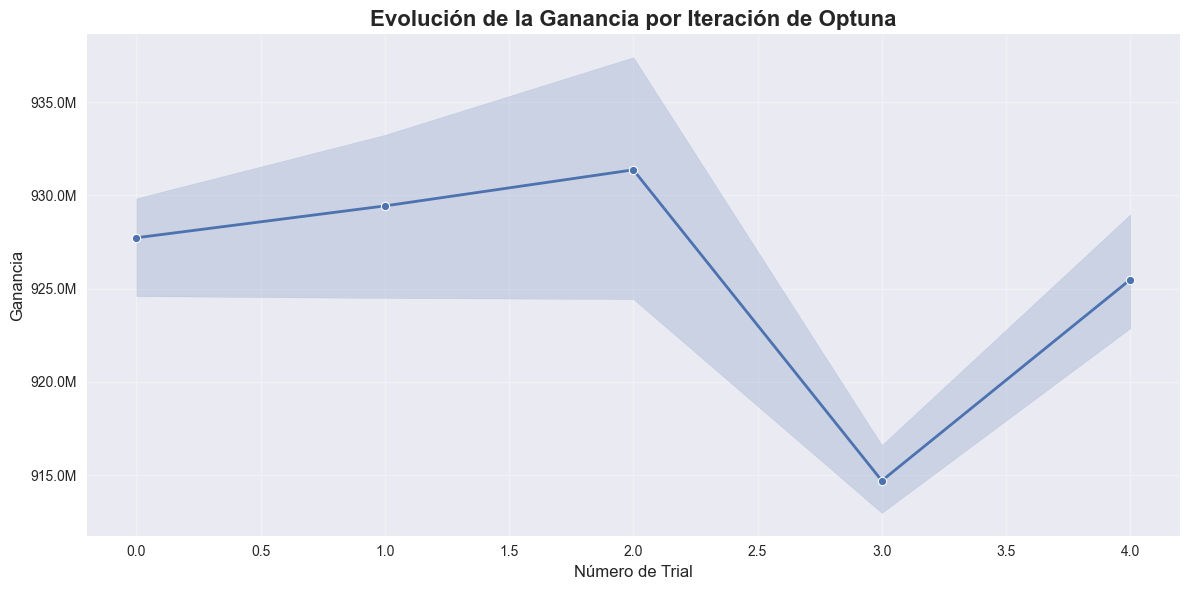


Estadísticas de ganancia:
Ganancia máxima: 937,400,000
Ganancia mínima: 912,980,000
Ganancia promedio: 925,744,000
Trial con mejor ganancia: 2


In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json("resultados/lgb_optimization_competencia01c_v2_iteraciones.json")
print(df.head())

#Graficar ganancia Optuna eje x trial_number eje y ganancia
# Configurar el estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

# Crear el gráfico
sns.lineplot(data=df, x='trial_number', y='value', marker='o', linewidth=2, markersize=6)

# Personalizar el gráfico
plt.title('Evolución de la Ganancia por Iteración de Optuna', fontsize=16, fontweight='bold')
plt.xlabel('Número de Trial', fontsize=12)
plt.ylabel('Ganancia', fontsize=12)
plt.grid(True, alpha=0.3)

# Formatear el eje y para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Mostrar estadísticas básicas
print(f"\nEstadísticas de ganancia:")
print(f"Ganancia máxima: {df['value'].max():,.0f}")
print(f"Ganancia mínima: {df['value'].min():,.0f}")
print(f"Ganancia promedio: {df['value'].mean():,.0f}")
print(f"Trial con mejor ganancia: {df.loc[df['value'].idxmax(), 'trial_number']}")